In [33]:
!pip install "gymnasium[toy-text]"

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/10.6 MB 2.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.6 MB 5.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.6 MB 9.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/10.6 MB 12.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.6 MB 13.7 MB/s eta 0:00:01
   ---------------- ----------------------- 4.4/10.6 MB 14.7 MB/s eta 0:00:01
   ------------------- -------------------- 5.3/10.6 MB 14.7 MB/s eta 0:00:01
   ----------------------- ---------------- 6.2/10.6 MB 15.8 MB/s eta 0:00:01
   -------------------------- ------------- 7.1/10.6 MB 15.6 MB/s eta 0:00:01
   ----------------------------- ---------- 7.8/10.6 MB 16.1 MB/s eta 0:00:01
   -------------------------------- ------- 8.5/10.6 MB 15.5 MB/s eta 0:00:0


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


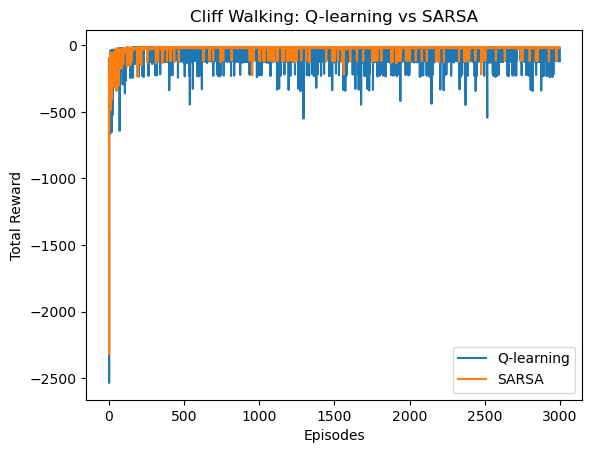

In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

alpha = 0.1  
gamma = 0.9  
epsilon = 0.1  
episodes = 3000

# env = gym.make('CliffWalking-v0', render_mode = "human")
env = gym.make('CliffWalking-v0')

# Initialize Q-tables

n_states = env.observation_space.n
n_actions = env.action_space.n

Q_qlearning = np.zeros((n_states, n_actions))
Q_sarsa = np.zeros((n_states, n_actions))

def choose_action(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  
    else:
        return np.argmax(Q[state])  

# Q-learning 
def q_learning():
    rewards_qlearning = []
    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = choose_action(Q_qlearning, state, epsilon)
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            # update
            best_next_action = np.argmax(Q_qlearning[next_state])
            td_target = reward + gamma * Q_qlearning[next_state][best_next_action]
            td_error = td_target - Q_qlearning[state][action]
            Q_qlearning[state][action] += alpha * td_error
            state = next_state
        rewards_qlearning.append(total_reward)
    return rewards_qlearning

# SARSA
def sarsa():
    rewards_sarsa = []
    for episode in range(episodes):
        state, _ = env.reset()
        action = choose_action(Q_sarsa, state, epsilon)
        total_reward = 0
        done = False
        while not done:
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            next_action = choose_action(Q_sarsa, next_state, epsilon)
            # update
            td_target = reward + gamma * Q_sarsa[next_state][next_action]
            td_error = td_target - Q_sarsa[state][action]
            Q_sarsa[state][action] += alpha * td_error
            state = next_state
            action = next_action
        rewards_sarsa.append(total_reward)
    return rewards_sarsa

rewards_qlearning = q_learning()
rewards_sarsa = sarsa()

plt.plot(rewards_qlearning, label='Q-learning')
plt.plot(rewards_sarsa, label='SARSA')
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Cliff Walking: Q-learning vs SARSA')
plt.legend()
plt.show()

In [2]:
n_actions, n_states

(4, 48)

In [3]:
Q_sarsa

array([[  -8.16557408,   -8.00121753,   -8.38816687,   -8.16175879],
       [  -7.94697289,   -7.75406474,   -8.12559712,   -8.18335855],
       [  -7.70824521,   -7.45463767,   -7.74224683,   -7.99417372],
       [  -7.41607581,   -7.11374382,   -7.47871735,   -7.77269041],
       [  -7.13234761,   -6.79207098,   -6.94218078,   -7.48154987],
       [  -6.78653378,   -6.43037785,   -6.6308978 ,   -7.16281735],
       [  -6.360656  ,   -5.9596047 ,   -6.1510392 ,   -6.79370043],
       [  -5.89208507,   -5.41765219,   -5.74260574,   -6.462879  ],
       [  -5.43805264,   -4.8724685 ,   -5.24161014,   -5.98144974],
       [  -4.92809413,   -4.30967606,   -4.54690176,   -5.52513862],
       [  -4.2826167 ,   -3.66090814,   -3.82672902,   -5.0074982 ],
       [  -3.62831261,   -3.53013173,   -2.85741294,   -4.32146333],
       [  -8.21593429,   -8.33339589,   -8.85277742,   -8.29549166],
       [  -7.97383506,   -7.90880151,  -10.55846091,   -8.22654282],
       [  -7.72455132,   -7.702065

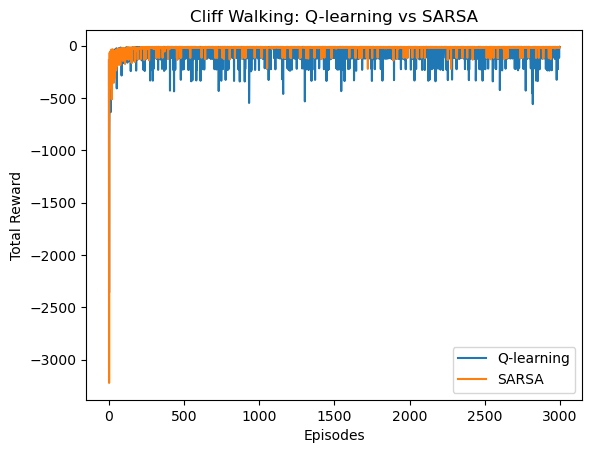

Q_qlearning [[  -7.27285379   -7.26970986   -7.31648872   -7.27696297]
 [  -7.08741735   -7.07682236   -7.08504033   -7.09128309]
 [  -6.82732097   -6.83171775   -6.8479297    -6.82888645]
 [  -6.55279532   -6.54823882   -6.5482048    -6.60374515]
 [  -6.24959337   -6.23264675   -6.24136942   -6.23629577]
 [  -5.90116111   -5.88232487   -5.88277206   -5.91594341]
 [  -5.50440575   -5.48209152   -5.49111176   -5.58773373]
 [  -5.07554812   -5.0458361    -5.04640064   -5.07082802]
 [  -4.60440141   -4.55672171   -4.55489417   -4.59929222]
 [  -4.05225728   -4.00959947   -4.00678697   -4.00615521]
 [  -3.44338661   -3.39413162   -3.39274761   -3.43971215]
 [  -2.7423891    -2.81802346   -2.70367196   -2.86064594]
 [  -7.43876069   -7.43267657   -7.43150431   -7.45354269]
 [  -7.19829091   -7.1712188    -7.17140694   -7.18132728]
 [  -6.92818374   -6.86066801   -6.86065421   -7.07938821]
 [  -6.63923266   -6.51274913   -6.51277038   -6.69537438]
 [  -6.24826941   -6.12562062   -6.12561233 

In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

alpha = 0.1  
gamma = 0.9  
epsilon = 0.1  
episodes = 3000

env = gym.make('CliffWalking-v0')

#  Q-tables
n_states = env.observation_space.n
n_actions = env.action_space.n

Q_qlearning = np.zeros((n_states, n_actions))
Q_sarsa = np.zeros((n_states, n_actions))

# choose an action using epsilon-greedy policy
def choose_action(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  
    else:
        return np.argmax(Q[state])  

# Q-learning 
def q_learning():
    rewards_qlearning = []
    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = choose_action(Q_qlearning, state, epsilon)
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            #  update
            best_next_action = np.argmax(Q_qlearning[next_state])
            td_target = reward + gamma * Q_qlearning[next_state][best_next_action]
            td_error = td_target - Q_qlearning[state][action]
            Q_qlearning[state][action] += alpha * td_error
            state = next_state
        rewards_qlearning.append(total_reward)
    return rewards_qlearning

# SARSA
def sarsa():
    rewards_sarsa = []
    for episode in range(episodes):
        state, _ = env.reset()
        action = choose_action(Q_sarsa, state, epsilon)
        total_reward = 0
        done = False
        while not done:
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            next_action = choose_action(Q_sarsa, next_state, epsilon)
            #  update
            td_target = reward + gamma * Q_sarsa[next_state][next_action]
            td_error = td_target - Q_sarsa[state][action]
            Q_sarsa[state][action] += alpha * td_error
            state = next_state
            action = next_action
        rewards_sarsa.append(total_reward)
    return rewards_sarsa

rewards_qlearning = q_learning()
rewards_sarsa = sarsa()

plt.plot(rewards_qlearning, label='Q-learning')
plt.plot(rewards_sarsa, label='SARSA')
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Cliff Walking: Q-learning vs SARSA')
plt.legend()
plt.show()

def display_path(Q, algorithm_name):
    env = gym.make('CliffWalking-v0', render_mode='human')
    state, _ = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = np.argmax(Q[state])  # Greedy policy
        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward
        state = next_state
        env.render()  # Render the environment
    print(f"Total reward for {algorithm_name}: {total_reward}")
    env.close()
print("Q_qlearning", Q_qlearning)
print("Q_sarsa", Q_sarsa)


# Display paths for both algorithms
display_path(Q_qlearning, "Q-learning")
display_path(Q_sarsa, "SARSA")

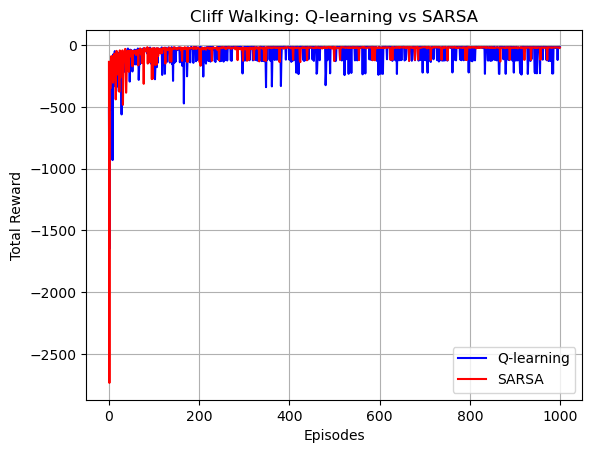

In [22]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 1000

# Initialize environment
env = gym.make('CliffWalking-v0')

# Initialize Q-tables
n_states = env.observation_space.n
n_actions = env.action_space.n
Q_qlearning = np.zeros((n_states, n_actions))
Q_sarsa = np.zeros((n_states, n_actions))

# hoose an action using epsilon-greedy policy
def choose_action(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# Q-learning 
def q_learning():
    rewards_qlearning = []
    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = choose_action(Q_qlearning, state, epsilon)
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            # Q-learning update
            best_next_action = np.argmax(Q_qlearning[next_state])
            td_target = reward + gamma * Q_qlearning[next_state][best_next_action]
            td_error = td_target - Q_qlearning[state][action]
            Q_qlearning[state][action] += alpha * td_error
            state = next_state
        rewards_qlearning.append(total_reward)
    return rewards_qlearning

# SARSA
def sarsa():
    rewards_sarsa = []
    for episode in range(episodes):
        state, _ = env.reset()
        action = choose_action(Q_sarsa, state, epsilon)
        total_reward = 0
        done = False
        while not done:
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            next_action = choose_action(Q_sarsa, next_state, epsilon)
            # SARSA update
            td_target = reward + gamma * Q_sarsa[next_state][next_action]
            td_error = td_target - Q_sarsa[state][action]
            Q_sarsa[state][action] += alpha * td_error
            state = next_state
            action = next_action
        rewards_sarsa.append(total_reward)
    return rewards_sarsa

# Run 
rewards_qlearning = q_learning()
rewards_sarsa = sarsa()

# Plot 
plt.plot(rewards_qlearning, label='Q-learning', color='blue')
plt.plot(rewards_sarsa, label='SARSA', color='red')

plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Cliff Walking: Q-learning vs SARSA')
plt.legend()
plt.grid(True)
plt.show()